In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from zipfile import ZipFile
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from keras.preprocessing import timeseries_dataset_from_array as ts_split
from keras import layers as kl

In [91]:
# Open the pickle file
df = pickle.load(open('../../data/processed/merged_data_202506141602.pkl', 'rb'))
df

,AAL_%Chg,ALGT_%Chg,ALK_%Chg,DAL_%Chg,ITA_%Chg,IYT_%Chg,JBLU_%Chg,JETS_%Chg,LUV_%Chg,UAL_%Chg,...,month_of_year_11,month_of_year_12,hour_of_day_9,hour_of_day_10,hour_of_day_11,hour_of_day_12,hour_of_day_13,hour_of_day_14,hour_of_day_15,is_open
2018-01-02 09:30:00,0.13,0.52,1.31,0.31,0.08,0.80,0.13,0.68,0.49,0.43,...,False,False,True,False,False,False,False,False,False,1
2018-01-02 09:45:00,0.19,-0.88,0.05,-0.13,-0.12,0.07,-0.25,-0.04,0.43,-0.25,...,False,False,True,False,False,False,False,False,False,0
2018-01-02 10:00:00,-0.08,1.09,0.18,0.22,0.17,0.23,0.27,0.32,-0.18,0.13,...,False,False,False,True,False,False,False,False,False,0
2018-01-02 10:15:00,0.02,-0.03,0.20,0.03,-0.16,-0.29,-0.38,-0.01,-0.27,0.28,...,False,False,False,True,False,False,False,False,False,0
2018-01-02 10:30:00,0.04,-0.74,0.05,0.30,-0.18,-0.09,-0.04,-0.08,0.30,0.24,...,False,False,False,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30 14:45:00,0.22,0.13,0.09,0.02,0.10,0.12,0.39,0.09,0.12,0.29,...,False,False,False,False,False,False,False,True,False,0
2025-05-30 15:00:00,0.09,-0.03,-0.09,0.21,0.11,0.02,-0.39,0.07,0.21,0.05,...,False,False,False,False,False,False,False,False,True,0
2025-05-30 15:15:00,0.26,0.21,0.24,0.35,0.22,0.18,0.29,0.22,0.21,0.49,...,False,False,False,False,False,False,False,False,True,0
2025-05-30 15:30:00,-0.13,-0.11,-0.31,-0.24,-0.11,-0.14,-0.49,-0.09,-0.15,-0.19,...,False,False,False,False,False,False,False,False,True,0


In [92]:
list(df.columns)

['AAL_%Chg',
 'ALGT_%Chg',
 'ALK_%Chg',
 'DAL_%Chg',
 'ITA_%Chg',
 'IYT_%Chg',
 'JBLU_%Chg',
 'JETS_%Chg',
 'LUV_%Chg',
 'UAL_%Chg',
 'AAL_Change',
 'ALGT_Change',
 'ALK_Change',
 'DAL_Change',
 'ITA_Change',
 'IYT_Change',
 'JBLU_Change',
 'JETS_Change',
 'LUV_Change',
 'UAL_Change',
 'AAL_High',
 'ALGT_High',
 'ALK_High',
 'DAL_High',
 'ITA_High',
 'IYT_High',
 'JBLU_High',
 'JETS_High',
 'LUV_High',
 'UAL_High',
 'AAL_High-Low',
 'ALGT_High-Low',
 'ALK_High-Low',
 'DAL_High-Low',
 'ITA_High-Low',
 'IYT_High-Low',
 'JBLU_High-Low',
 'JETS_High-Low',
 'LUV_High-Low',
 'UAL_High-Low',
 'AAL_High-Low%',
 'ALGT_High-Low%',
 'ALK_High-Low%',
 'DAL_High-Low%',
 'ITA_High-Low%',
 'IYT_High-Low%',
 'JBLU_High-Low%',
 'JETS_High-Low%',
 'LUV_High-Low%',
 'UAL_High-Low%',
 'AAL_Last',
 'ALGT_Last',
 'ALK_Last',
 'DAL_Last',
 'ITA_Last',
 'IYT_Last',
 'JBLU_Last',
 'JETS_Last',
 'LUV_Last',
 'UAL_Last',
 'AAL_Last-Open',
 'ALGT_Last-Open',
 'ALK_Last-Open',
 'DAL_Last-Open',
 'ITA_Last-Open',
 

In [93]:
# Data preprocessing
y_cols = ['AAL_Change']
x_cols = ['AAL_Change',
        'ALGT_Change','ALK_Change','DAL_Change','ITA_Change','IYT_Change','JBLU_Change','JETS_Change','LUV_Change','UAL_Change',
        'AAL_High-Low','ALGT_High-Low','ALK_High-Low','DAL_High-Low','ITA_High-Low','IYT_High-Low','JBLU_High-Low','JETS_High-Low','LUV_High-Low','UAL_High-Low',
        'AAL_Last-Open','ALGT_Last-Open','ALK_Last-Open','DAL_Last-Open','ITA_Last-Open','IYT_Last-Open','JBLU_Last-Open','JETS_Last-Open','LUV_Last-Open','UAL_Last-Open',
        'AAL_Roll_SDSD_Last_10','ALGT_Roll_SDSD_Last_10','ALK_Roll_SDSD_Last_10','DAL_Roll_SDSD_Last_10','ITA_Roll_SDSD_Last_10','IYT_Roll_SDSD_Last_10','JBLU_Roll_SDSD_Last_10','JETS_Roll_SDSD_Last_10','LUV_Roll_SDSD_Last_10','UAL_Roll_SDSD_Last_10',
        'AAL_Roll_SDSD_Volume_10','ALGT_Roll_SDSD_Volume_10','ALK_Roll_SDSD_Volume_10','DAL_Roll_SDSD_Volume_10','ITA_Roll_SDSD_Volume_10','IYT_Roll_SDSD_Volume_10','JBLU_Roll_SDSD_Volume_10','JETS_Roll_SDSD_Volume_10','LUV_Roll_SDSD_Volume_10','UAL_Roll_SDSD_Volume_10',
        'Oil_Change','Oil_High-Low', 'Oil_Last-Open','Oil_Roll_SD_Last_10','Oil_Roll_SDSD_Last_10','Oil_Roll_SD_Volume_10','Oil_Roll_SDSD_Volume_10',
        'day_of_week_0','day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4',
        'month_of_year_1','month_of_year_2','month_of_year_3','month_of_year_4','month_of_year_5','month_of_year_6','month_of_year_7','month_of_year_8','month_of_year_9','month_of_year_10','month_of_year_11','month_of_year_12',
        'hour_of_day_9','hour_of_day_10','hour_of_day_11','hour_of_day_12','hour_of_day_13','hour_of_day_14','hour_of_day_15','is_open',
        'PCA_GKG1_0_AAL_diff','PCA_GKG1_1_AAL_diff','PCA_GKG1_2_AAL_diff','PCA_GKG1_3_AAL_diff','PCA_GKG1_4_AAL_diff',
        'PCA_GKG1_0_general_diff','PCA_GKG1_1_general_diff','PCA_GKG1_2_general_diff','PCA_GKG1_3_general_diff','PCA_GKG1_4_general_diff',
        'PCA_GKG1_0_AAL','PCA_GKG1_1_AAL','PCA_GKG1_2_AAL','PCA_GKG1_3_AAL','PCA_GKG1_4_AAL',
        ]

y = df[y_cols]
x = df[x_cols]

In [94]:
# Train/text splitting
split_val  = round(0.7 * len(x))
split_test = round(0.9 * len(x))

x_train = x[:split_val]
x_val   = x[split_val:split_test]
x_test  = x[split_test:]

y_train = y[:split_val]
y_val   = y[split_val:split_test]
y_test  = y[split_test:]

In [95]:
# Normalize the features to [0,1]
sc2 = MinMaxScaler(feature_range=(0, 1))

x_train = sc2.fit_transform(x_train)
x_val   = sc2.transform(x_val)
x_test  = sc2.transform(x_test)

In [96]:
def create_tensor(data, type:str, steps_historical=26, steps_future=6, skiprows=1):
    # Need to fix skiprows to make the output data shorter

    tot_length = len(data) - steps_historical - steps_future + 1

    if type.lower() == 'x':
        x_tensor = np.zeros(shape=(tot_length, steps_historical, data.shape[1]))
        for i in range(0, tot_length, skiprows):
            j = i + steps_historical
            x_tensor[i] = data[i:j]
        return x_tensor
    
    elif type.lower() == 'y':
        y_tensor = np.zeros(shape=(tot_length, steps_future, data.shape[1]))
        for i in range(0, tot_length, skiprows):
            j = i + steps_historical
            k = j + steps_future
            y_tensor[i] = data[j:k]
        return y_tensor
    
    else:
        raise ValueError("Type must be 'x' or 'y'.")

In [97]:
steps_historical = 3
steps_future = 1

x_tensor_train = create_tensor(x_train, type='x', steps_historical=steps_historical, steps_future=steps_future)
x_tensor_test  = create_tensor(x_test , type='x', steps_historical=steps_historical, steps_future=steps_future)
x_tensor_val   = create_tensor(x_val  , type='x', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_train = create_tensor(y_train, type='y', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_test  = create_tensor(y_test , type='y', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_val   = create_tensor(y_val  , type='y', steps_historical=steps_historical, steps_future=steps_future)

In [98]:
for i in ['x_tensor_train', 'x_tensor_test', 'x_tensor_val', 'y_tensor_train', 'y_tensor_test', 'y_tensor_val']:
    print(f"{i} shape: {eval(i).shape}")

x_tensor_train shape: (33793, 3, 97)
x_tensor_test shape: (4825, 3, 97)
x_tensor_val shape: (9653, 3, 97)
y_tensor_train shape: (33793, 1, 1)
y_tensor_test shape: (4825, 1, 1)
y_tensor_val shape: (9653, 1, 1)


In [99]:
# Calculate the loss on a Naive model: predict 0 change as the next value
naive_mae_train = np.nanmean(np.abs(0 - y_tensor_train[:, -1, 0]))
naive_mae_val = np.mean(np.abs(0 - y_tensor_val[:, -1, 0]))

print(f"Naive model MAE on training data: {naive_mae_train:.6f}")
print(f"Naive model MAE on validation data: {naive_mae_val:.6f}")

Naive model MAE on training data: 0.084901
Naive model MAE on validation data: 0.037348


In [100]:
# Custom loss function to report MAE divided by naive_mae_val
def custom_loss(y_true, y_pred):
    mae = keras.losses.mean_absolute_error(y_true, y_pred)
    return mae / naive_mae_val

In [101]:
inputs = kl.Input(shape=(steps_historical, len(x_cols)))

# LSTM layer that returns sequence
lstm_out = kl.LSTM(50, return_sequences=True)(inputs)

# Self-attention mechanism
attention = kl.Attention()([lstm_out, lstm_out])

# Get the last time step for prediction
last_lstm_out = kl.LSTM(50)(attention)

# Output layer
outputs = kl.Dense(1)(last_lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'rmsprop', 
    loss = custom_loss
    )
model.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23      │ (None, 3, 97)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ (None, 3, 50)     │     29,600 │ input_layer_23[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_2         │ (None, 3, 50)     │          0 │ lstm_8[0][0],     │
│ (Attention)         │                   │            │ lstm_8[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 50)        │     20,200 │ attention_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         51 │ lstm_9[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 49,851 (194.73 KB)

 Trainable params: 49,851 (194.73 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# Designing the model structure
kern = steps_historical-steps_future+1

model = keras.Sequential([
    kl.Input(shape=(steps_historical, len(x_cols))),
#    kl.Conv1D(len(x_cols), kernel_size=1),
    kl.SimpleRNN(2*len(x_cols), return_sequences=True, dropout=0.5),
#    kl.SimpleRNN(round(len(x_cols)/2), return_sequences=True, dropout=0.2),
#    kl.SimpleRNN(round(len(x_cols)/4), return_sequences=True, dropout=0),
#    kl.Conv1D(25, kernel_size=kern),
#    kl.LSTM(10, return_sequences=True),
    kl.SimpleRNN(1)
])

model.compile(
    optimizer = 'rmsprop', 
    loss = custom_loss
    )
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_44 (SimpleRNN)       │ (None, 3, 194)         │        56,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_45 (SimpleRNN)       │ (None, 1)              │           196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,844 (222.05 KB)

 Trainable params: 56,844 (222.05 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
# This will monitor validation loss and stop training if it doesn't improve after 5 epochs
#es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=10)

history = model.fit(
    x_tensor_train, 
    y_tensor_train,
    validation_data = (x_tensor_val, y_tensor_val),
    steps_per_epoch= round(len(x_tensor_train)/10),
    epochs = 100, 
    verbose = 1,
    batch_size = None,
    #callbacks = [es_callback],
    shuffle=False)

Epoch 1/100
3065/3379 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3375

c:\Users\Steven\Desktop\school github repos\svo-directed-practicum\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3379/3379 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 6.1080 - val_loss: 2.1502
Epoch 2/100
3379/3379 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3.1944 - val_loss: 2.7873
Epoch 3/100
3379/3379 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3.1831 - val_loss: 2.5130
Epoch 4/100
3379/3379 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3.1698 - val_loss: 2.9890
Epoch 5/100
3379/3379 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3.1813 - val_loss: 3.9241
Epoch 6/100
3379/3379 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3.1677 - val_loss: 2.9092
Epoch 7/100
3379/3379 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3.1670 - val_loss: 2.5832
Epoch 8/100
3379/3379 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3.1570 - val_loss: 2.4656
Epoch 9/100
3379/3379 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3.1570 - val_loss: 1.6746
Epoch 10/100
3379/3379 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 3.1492 - val_loss: 3.4585
Epoch 11/100
3379/3379 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 3.1622 - val_loss: 2.6247
Epoch 12/100
3379/3379 ━━━━━━━━

KeyboardInterrupt: 

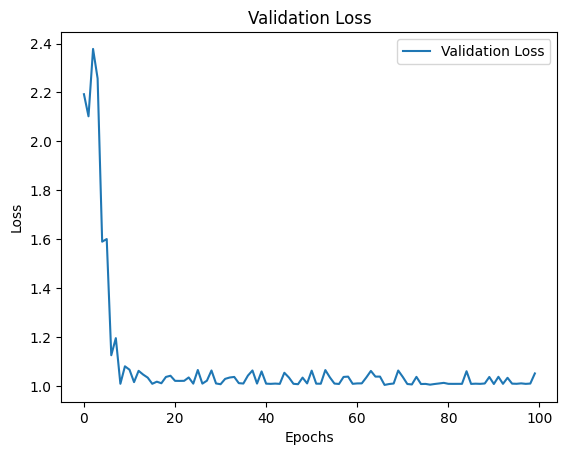

In [69]:
# Plot the validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

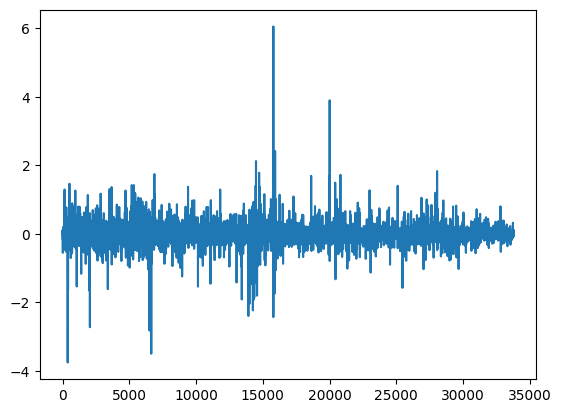

In [422]:
# Transform y_tensor_val from shape (9633, 12, 1) to (9633, 12)
y_tensor_train = y_tensor_train.reshape(y_tensor_train.shape[0], y_tensor_train.shape[1])
plt.plot(pd.DataFrame(y_tensor_train).iloc[:,0].to_frame())